In [103]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [104]:
image = imread("data/peppers-large.tiff")
A = imread("data/peppers-small.tiff")

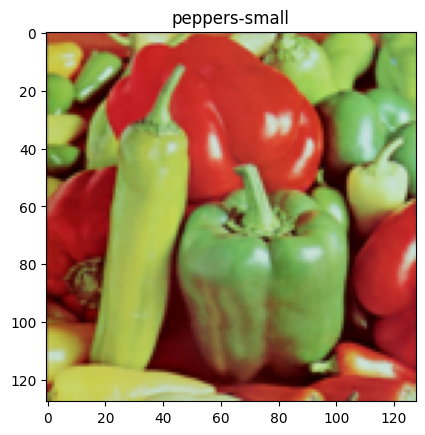

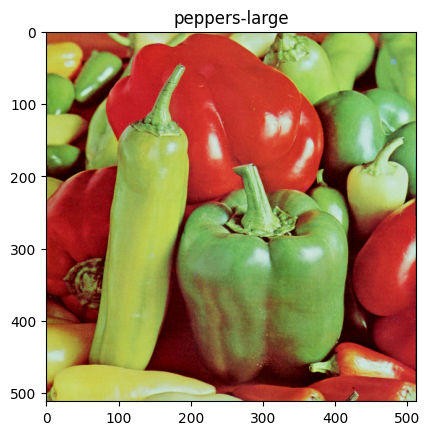

In [105]:
#mat[i][j] is a (3,) vector for RGB
#mat[:,:,0] is a 512x512 matrix for the R values for the image
plt.imshow(A)
plt.title("peppers-small")
plt.show()
plt.imshow(image)
plt.title("peppers-large")
plt.show()

In [106]:
import numpy as np
class imageTransform():
    def __init__(self, image: np.ndarray) -> None:
        self.image = image
        self.m = len(image)
        self.n = len(image[0])
    def imtodesign(self) -> np.ndarray:
        '''
        image is (m,n,3)
        we'll output (mn, 3)
        '''
        res = np.zeros((self.m*self.n, 3), dtype=int)
        for i in range(self.m):
            for j in range(self.n):
                res[i * self.n + j] = self.image[i][j]
        self.design = res
        return res

    def designtoim(self, design: np.ndarray) -> np.ndarray:
        '''
        design is (mn, 3)
        image is (m,n,3)
        '''
        res = np.zeros((self.m,self.n,3), dtype= int)
        for i in range(len(design)):
            res[i//self.n][i%self.n] = design[i]
        return res


In [107]:
from sklearn.cluster import KMeans
transformer = imageTransform(image)
design_matrix = transformer.imtodesign()
km = KMeans(n_clusters=16, init="k-means++", n_init=10)
km.fit(design_matrix)
clusters = km.cluster_centers_
print(clusters, clusters.shape)

[[117.63391069 168.55473076  81.50551824]
 [183.30693801  39.95946334  37.78242317]
 [ 89.72696246  14.26643419  12.55074937]
 [186.55532728 201.75439735  88.94615052]
 [116.82768994  76.41933678  41.91192109]
 [202.92576797  56.26585647  43.48387097]
 [109.90539832 127.23045073  59.74051363]
 [193.50490463 218.55540418 192.50245232]
 [203.60583672 111.88714444  75.23550055]
 [152.03960396   0.         184.07722772]
 [143.40232489 151.98384396  65.74012413]
 [ 47.52382471   1.75435351   1.15710914]
 [137.18427222 189.41663707 110.10264971]
 [157.0336036  184.84576088  81.60383372]
 [182.37297343 203.67753162 144.5055598 ]
 [144.23497828  22.5218388   25.01646959]] (16, 3)


In [108]:
predictions = km.predict(design_matrix)
print(predictions.shape[0], "predictions")
compressed = np.zeros((len(predictions),3), dtype=int)
for i in range(len(predictions)):
    compressed[i] = np.round(clusters[predictions[i]]).astype(int)
compressed_image = transformer.designtoim(compressed)

262144 predictions


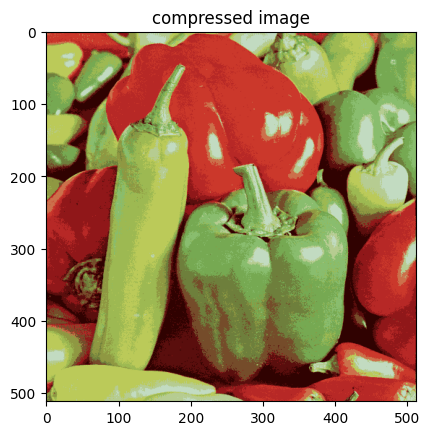

In [109]:
plt.imshow(compressed_image)
plt.title("compressed image")
plt.show()